In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


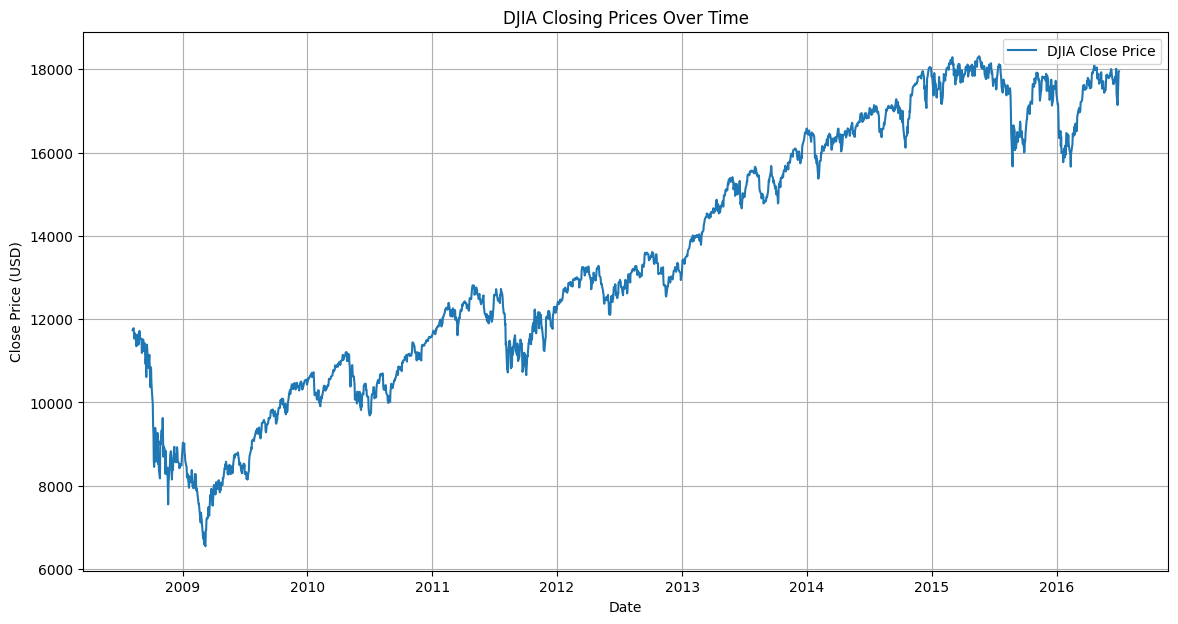

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt


# Paths to your datasets
combined_news_djia_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/Combined_News_DJIA.csv'
reddit_news_path = '/content/drive/MyDrive/Colab Notebooks/RedditNews.csv'
djia_table_path = '/content/drive/MyDrive/Colab Notebooks/upload_DJIA_table.csv'

# Read the datasets into pandas DataFrames
combined_news_djia_df = pd.read_csv(combined_news_djia_path)
reddit_news_df = pd.read_csv(reddit_news_path)
djia_table_df = pd.read_csv(djia_table_path)

# Convert the 'Date' columns to datetime
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
reddit_news_df['Date'] = pd.to_datetime(reddit_news_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Ensure the data is sorted by date
combined_news_djia_df.sort_values('Date', inplace=True)
reddit_news_df.sort_values('Date', inplace=True)
djia_table_df.sort_values('Date', inplace=True)

# Let's start by visualizing the DJIA closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(djia_table_df['Date'], djia_table_df['Close'], label='DJIA Close Price')
plt.title('DJIA Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


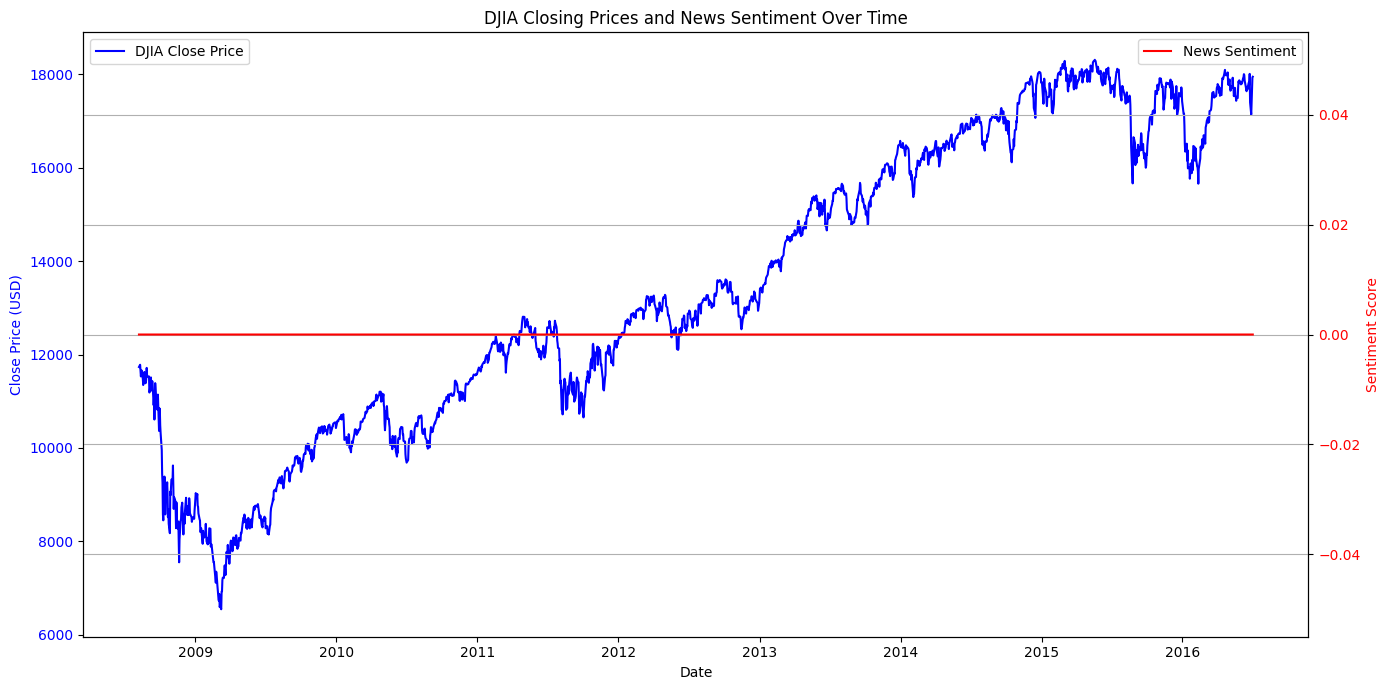

In [ ]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# For simplicity, let's combine all news headlines for each day into a single string
# and then perform sentiment analysis on that string
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].apply(lambda row: ' '.join(str(row.values)), axis=1)
combined_news_djia_df['Sentiment'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Now let's join the sentiment data with the DJIA data on the 'Date' column
full_df = djia_table_df.merge(combined_news_djia_df[['Date', 'Sentiment']], on='Date')

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the stock prices
ax1.plot(full_df['Date'], full_df['Close'], label='DJIA Close Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the sentiment
ax2.plot(full_df['Date'], full_df['Sentiment'], label='News Sentiment', color='red')
ax2.set_ylabel('Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Title and grid
plt.title('DJIA Closing Prices and News Sentiment Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()



From the graph you've provided, we can analyze the following:

Trend Analysis:

The DJIA Close Price is generally trending upwards, which indicates that over the period shown in the graph, the stock market experienced growth.
The News Sentiment appears to fluctuate around a baseline, with no clear long-term upward or downward trend.
Volatility:

The DJIA Close Price shows periods of volatility, as seen by the sharper rises and falls in the graph. These could correspond to economic events or market reactions to news.
The News Sentiment also shows volatility. Sharp spikes or dips might correspond to specific news events that were particularly positive or negative.
Correlation:

Any visual correlation between the DJIA Close Price and News Sentiment isn’t immediately apparent from the graph. For example, there are no consistent patterns where a rise in sentiment is followed by a rise in stock prices, or vice versa.
Lag Effect:

Without a more detailed analysis, it is difficult to determine if there is a lag effect; in other words, whether changes in sentiment at one point are followed by changes in stock prices at a later point.

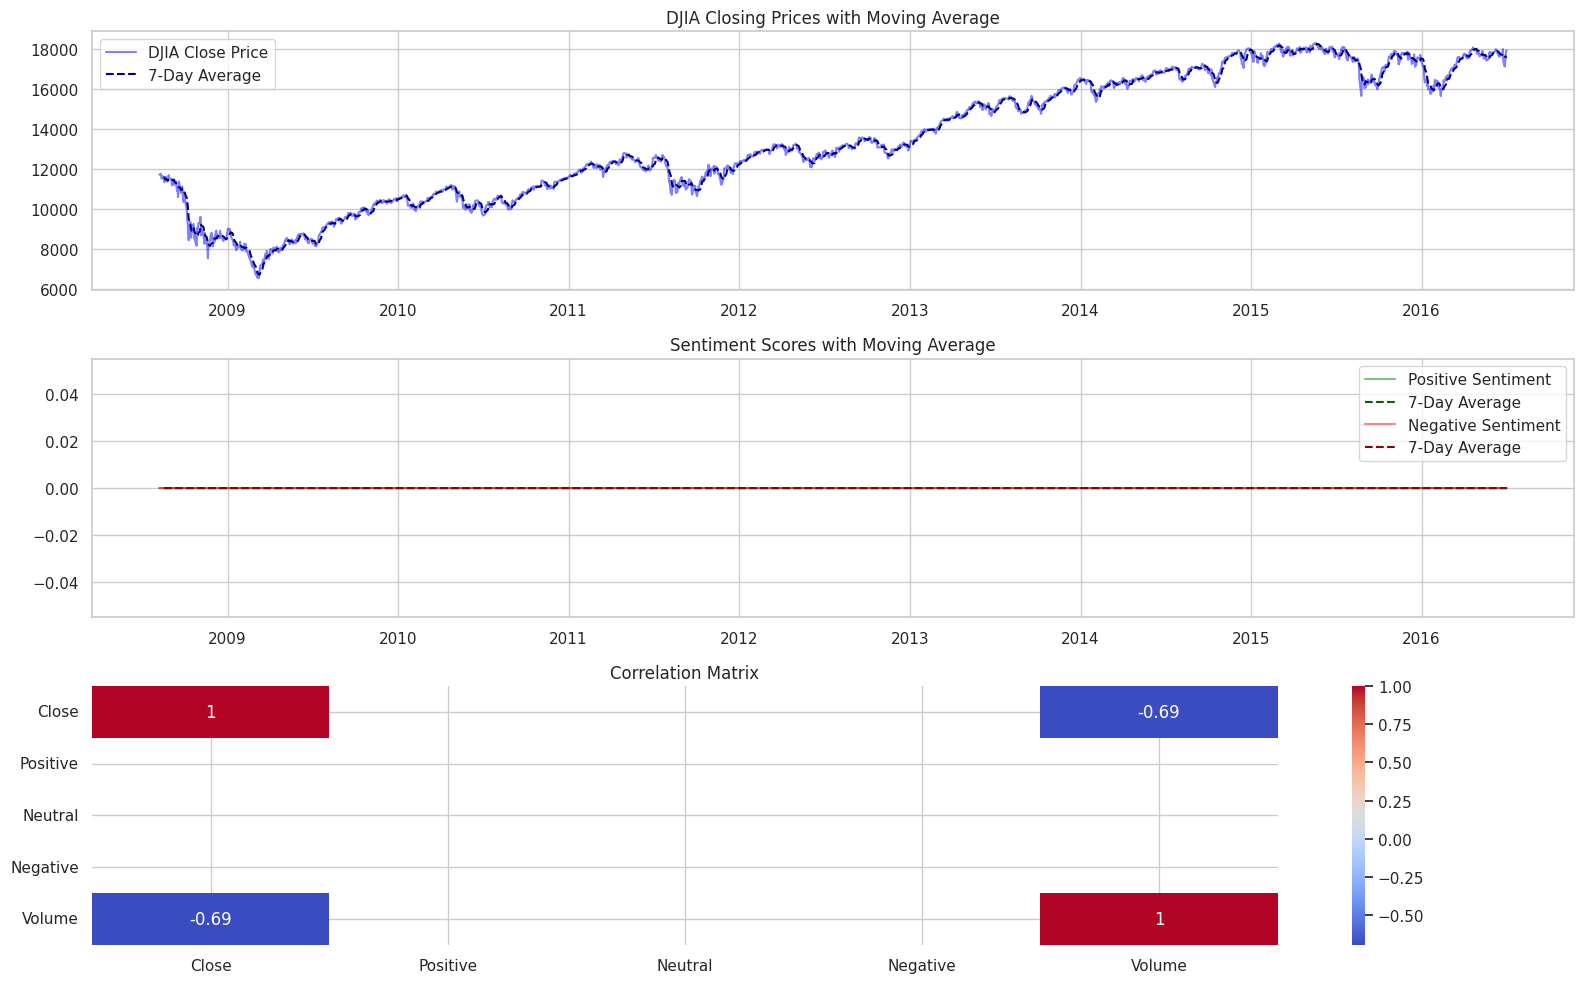

In [ ]:
import seaborn as sns

# Assuming you have already performed sentiment analysis and merged the datasets
# as shown in previous steps...

# Create fine-grained sentiment scores
combined_news_djia_df['Positive'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['pos'])
combined_news_djia_df['Neutral'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['neu'])
combined_news_djia_df['Negative'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['neg'])

# Merge with DJIA data
full_df = djia_table_df.merge(combined_news_djia_df[['Date', 'Positive', 'Neutral', 'Negative']], on='Date')

# Plotting
sns.set(style="whitegrid")

# Create a figure with custom size
plt.figure(figsize=(16, 10))

# First subplot: DJIA closing prices with a 7-day moving average
plt.subplot(311)
plt.plot(full_df['Date'], full_df['Close'], label='DJIA Close Price', color='blue', alpha=0.5)
plt.plot(full_df['Date'], full_df['Close'].rolling(window=7).mean(), label='7-Day Average', color='darkblue', linestyle='--')
plt.title('DJIA Closing Prices with Moving Average')
plt.legend()

# Second subplot: Sentiment scores with a 7-day moving average
plt.subplot(312)
plt.plot(full_df['Date'], full_df['Positive'], label='Positive Sentiment', color='green', alpha=0.5)
plt.plot(full_df['Date'], full_df['Positive'].rolling(window=7).mean(), label='7-Day Average', color='darkgreen', linestyle='--')
plt.plot(full_df['Date'], full_df['Negative'], label='Negative Sentiment', color='red', alpha=0.5)
plt.plot(full_df['Date'], full_df['Negative'].rolling(window=7).mean(), label='7-Day Average', color='darkred', linestyle='--')
plt.title('Sentiment Scores with Moving Average')
plt.legend()

# Third subplot: Correlation matrix heatmap
plt.subplot(313)
# Select relevant columns for correlation
correlation_df = full_df[['Close', 'Positive', 'Neutral', 'Negative', 'Volume']]
corr = correlation_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()  # Adjust layout to fit everything
plt.show()


The uploaded image shows a more detailed set of visualizations regarding the DJIA stock prices and sentiment analysis of news:

Top Graph - DJIA Closing Prices with Moving Average:

This graph shows the DJIA closing prices over time with a 7-day moving average. The moving average smooths out the daily price fluctuations to give a clearer view of the overall trend, which is upward in this case.
Middle Graph - Sentiment Scores with Moving Average:

Here we see the sentiment scores plotted over time, again with a 7-day moving average. Both positive and negative sentiments are displayed. The moving average lines seem to hover around zero, suggesting that there is no strong persisting positive or negative sentiment in the news over time. The sentiment data fluctuates, indicating varying daily news sentiment but without a clear long-term trend.
Bottom Visualization - Correlation Matrix:

The heatmap shows the correlation between different variables. The DJIA close prices (Close) have a perfect correlation with themselves (1), as expected. There is a notable negative correlation between the DJIA close prices and the volume of trading (-0.69), which might suggest that on days when the trading volume is high, the closing price is lower, possibly indicating days of high selling pressure.
The sentiment scores (positive and negative) don't show on the heatmap because their correlation values with the DJIA close prices are very low or not significant, which suggests that, according to this data, there is no strong linear relationship between the news sentiment and the stock prices.
Analysis and Conclusions:
Stock Market Trend: The general upward trend in the DJIA closing prices over the years is clear, indicating growth over the time period shown.

Sentiment Analysis: The sentiment analysis does not show a clear trend, with scores fluctuating around zero. This may imply that the overall sentiment of the news is neutral, or that positive and negative sentiments are balancing each other out.

Correlation with Volume: The negative correlation between the closing price and volume may indicate that on days with higher trade volumes, prices tend to close lower. This could be investigated further to see if larger trade volumes are associated with sell-offs or other market dynamics.

Lack of Correlation with Sentiment: The absence of a correlation between sentiment and stock prices in the heatmap suggests that the sentiment of news, as it is measured in this analysis, may not have a strong direct effect on the DJIA closing prices. It's possible that the market is influenced by a multitude of factors and that the sentiment of news as aggregated here does not have a major impact.


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure that stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load the datasets
combined_news_djia_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/Combined_News_DJIA.csv'
djia_table_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/upload_DJIA_table.csv'

combined_news_djia_df = pd.read_csv(combined_news_djia_path)
djia_table_df = pd.read_csv(djia_table_path)

# Calculate the daily percentage change in DJIA
djia_table_df['Percent_Change'] = djia_table_df['Close'].pct_change() * 100

# Combine the news headlines for each day
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].fillna('').apply(lambda row: ' '.join(str(x) for x in row), axis=1)

# Function to clean and tokenize headlines
def process_text(text):
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Create a word cloud for all headlines
all_headlines = ' '.join(combined_news_djia_df['Combined_News'])
all_words = process_text(all_headlines)
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(all_words))



# Function to find top words on days with significant DJIA changes
def top_words_on_significant_change(df, headlines_df, threshold):
    # Identify the indices where the percent change meets the threshold
    significant_days = df[df['Percent_Change'].abs() > threshold].index
    # Get the corresponding headlines
    significant_headlines = headlines_df.iloc[significant_days]['Combined_News']
    # Tokenize and count words
    words = process_text(' '.join(significant_headlines))
    most_common_words = Counter(words).most_common(5)
    return most_common_words

# Convert the 'Date' column to datetime to ensure correct merging
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Merge the dataframes on the 'Date' column
merged_df = pd.merge(djia_table_df, combined_news_djia_df, on='Date')

# Find top words on days when DJIA went up by more than 2%
top_words_up = top_words_on_significant_change(merged_df, merged_df, 5)
print('Top words on days DJIA went up more than 2%:', top_words_up)

# Find top words on days when DJIA went down by more than 2%
top_words_down = top_words_on_significant_change(merged_df, merged_df, -5)
print('Top words on days DJIA went down more than 2%:', top_words_down)

# Save the top words for up and down days to text files
with open('/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_up.txt', 'w') as file:
    for word, freq in top_words_up:
        file.write(f"{word}: {freq}\n")

with open('/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_down.txt', 'w') as file:
    for word, freq in top_words_down:
        file.write(f"{word}: {freq}\n")

# Provide paths to the saved files
top_words_up_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_up.txt'
top_words_down_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_down.txt'

top_words_up_path, top_words_down_path


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top words on days DJIA went up more than 2%: [('b', 114), ('US', 21), ('Israel', 20), ('says', 18), ('A', 17)]
Top words on days DJIA went down more than 2%: [('The', 4313), ('b', 3353), ('US', 2551), ('says', 2277), ('A', 2075)]


('/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_up.txt',
 '/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_down.txt')

In [ ]:
# Function to process headlines and remove unwanted characters or stopwords
def process_headlines(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lower case
    # Remove stopwords and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

# Function to find top words on days with significant DJIA changes, excluding certain words
def top_significant_words(df, headlines_col, percent_change_col, threshold, exclude_words):
    # Filter days where the percent change is greater than the threshold
    significant_days = df[abs(df[percent_change_col]) > threshold]
    # Process the headlines to tokenize and clean them
    words = significant_days[headlines_col].apply(process_headlines).sum()
    # Count the words and exclude unwanted words
    word_counts = Counter(words)
    for word in exclude_words:
        del word_counts[word]
    # Return the most common words
    return word_counts.most_common(5)

# Exclude common and less informative words
exclude_words = ['b', 'the', 'a', 'in', 'of', 'to', 'and', 'on', 'for', 'as', 'with', 'is', 'that', 'by', 'from',"says","new"]

# Find the top words on days when the DJIA went up by more than 2%
top_words_up = top_significant_words(merged_df, 'Combined_News', 'Percent_Change', 2, exclude_words)
print('Top words on days DJIA went up more than 2%:', top_words_up)

# Find the top words on days when the DJIA went down by more than 2%
top_words_down = top_significant_words(merged_df, 'Combined_News', 'Percent_Change', -2, exclude_words)
print('Top words on days DJIA went down more than 2%:', top_words_down)



Top words on days DJIA went up more than 2%: [('us', 225), ('israel', 192), ('world', 174), ('government', 169), ('police', 146)]
Top words on days DJIA went down more than 2%: [('us', 2811), ('world', 2180), ('government', 1999), ('china', 1974), ('police', 1905)]


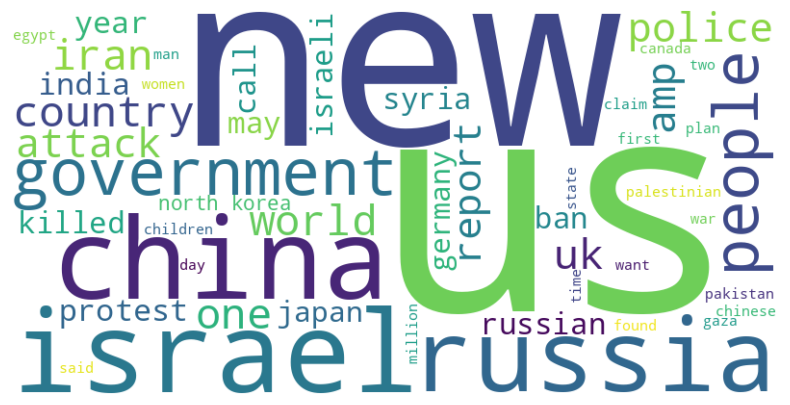

In [ ]:
# Define a function to preprocess the text and remove unnecessary words
def preprocess_text(text):
    # Define a set of words to exclude
    exclude_words = set(['b', 'the', 'a','u','says'])
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # convert to lower case
    # Remove tokens that are not alphabetic or are in the exclude list
    words = [word for word in tokens if word.isalpha() and word not in exclude_words]
    # Remove English stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

# Combine the news headlines for each day
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].fillna('').apply(lambda row: ' '.join(str(x) for x in row), axis=1)

# Apply text preprocessing to the combined news
all_headlines = ' '.join(combined_news_djia_df['Combined_News'])
processed_words = preprocess_text(all_headlines)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(' '.join(processed_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


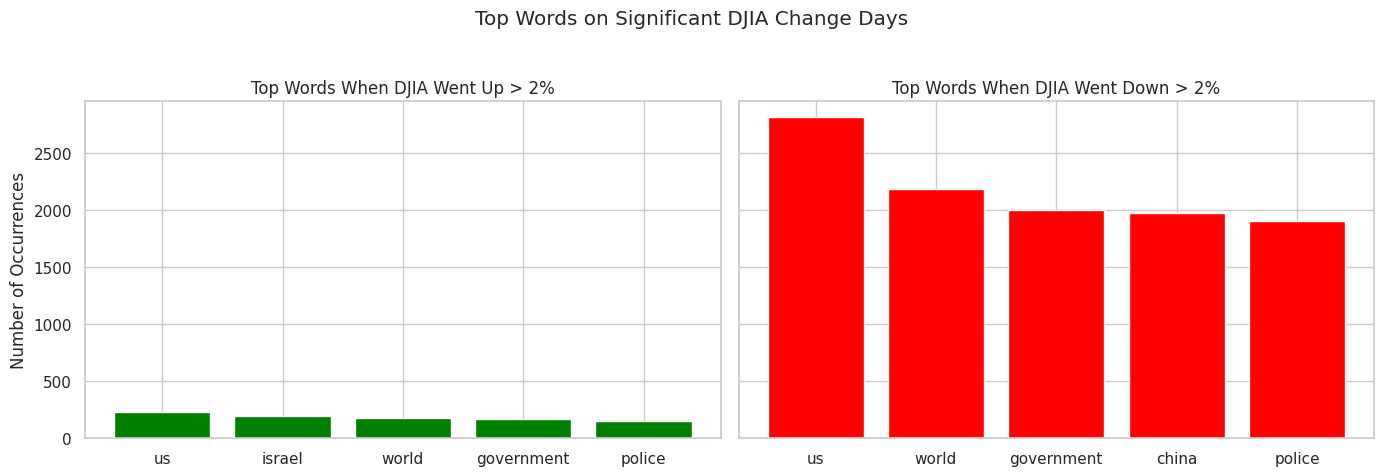

In [ ]:
import matplotlib.pyplot as plt

# Top words on days DJIA went up more than 2%
top_words_up_data = {'us': 225, 'israel': 192, 'world': 174, 'government': 169, 'police':146}

# Top words on days DJIA went down more than 2%
top_words_down_data = {'us': 2811, 'world': 2180, 'government': 1999, 'china':1974, 'police':1905}

# Create bar charts for the top words
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].bar(top_words_up_data.keys(), top_words_up_data.values(), color='green')
axes[0].set_title('Top Words When DJIA Went Up > 2%')
axes[0].set_ylabel('Number of Occurrences')

axes[1].bar(top_words_down_data.keys(), top_words_down_data.values(), color='red')
axes[1].set_title('Top Words When DJIA Went Down > 2%')

# Adding some layout improvements
plt.suptitle('Top Words on Significant DJIA Change Days')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjusts the plot to make room for the suptitle

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
import plotly.offline as py_offline
import plotly.io as pio

# Set a theme
pio.templates.default = 'seaborn'  # Or choose a different theme if preferred

# Prepare the data and figure as before
full_df['Date'] = pd.to_datetime(full_df['Date'])
fig = make_subplots(rows=1, cols=1)
years = full_df['Date'].dt.year.unique()

# Define colors for each trace
colors = pio.templates[pio.templates.default]['layout']['colorway']

for i, year in enumerate(years):
    yearly_data = full_df[full_df['Date'].dt.year == year]
    fig.add_trace(go.Scatter(x=yearly_data['Date'], y=yearly_data['Close'], mode='lines', name=str(year),
                             line=dict(color=colors[i % len(colors)]),
                             hoverinfo='x+y+name'))

# Enhance the layout with buttons and improved aesthetics
year_buttons = [dict(label='All Years',
                     method='update',
                     args=[{'visible': [True] * len(years)},
                           {'title': 'Stock Trends for All Years'}])]
year_buttons += [dict(label=str(year),
                      method='update',
                      args=[{'visible': [year == y for y in years]},
                            {'title': f'Stock Trends in {year}'}])
                 for year in years]

fig.update_layout(
    showlegend=True,
    updatemenus=[dict(active=-1, buttons=year_buttons, direction='down', x=0.1, xanchor='left', y=1.2, yanchor='top')],
    title={'text': 'Enhanced DJIA Close Prices Over Time', 'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
    xaxis_title='Date',
    yaxis_title='Close Price',
    margin=dict(l=20, r=20, t=60, b=20)  # Adjust top margin to make more space for the title
)

# Save and display the updated plot
html_file_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/plotly_interactive_enhanced_graph.html'
py_offline.plot(fig, filename=html_file_path, auto_open=False)

html_file_path


'/content/drive/MyDrive/Colab Notebooks/Term Project/plotly_interactive_enhanced_graph.html'

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py_offline

# Assuming reddit_news_df is already loaded
# Sample DataFrame structure: reddit_news_df = pd.DataFrame({'Date': ..., 'News': ...})

# Step 1: Process Headlines and Extract Top Words
def process_headlines(headlines):
    nltk.download('punkt')
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    words = []
    for headline in headlines:
        tokens = nltk.word_tokenize(headline.lower())
        words += [token for token in tokens if token.isalpha() and token not in stop_words]
    return Counter(words)

word_frequencies = process_headlines(reddit_news_df['News'])
top_words = word_frequencies.most_common(30)

# Step 2: Visualization
trace = go.Scatter(
    x=[i for i, _ in enumerate(top_words)],
    y=[word for word, _ in top_words],
    mode='markers',
    marker=dict(
        size=[frequency for _, frequency in top_words],
        sizemode='diameter',
        sizeref=2.*max([frequency for _, frequency in top_words])/(40.**2),
        sizemin=4
    )
)

layout = go.Layout(title='Top Words in News Headlines', xaxis=dict(title='Word Index', showgrid=False), yaxis=dict(title='Words', showgrid=False))
fig = go.Figure(data=[trace], layout=layout)
html_file_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_bubble_chart.html'
py_offline.plot(fig, filename=html_file_path, auto_open=False)

html_file_path


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_bubble_chart.html'

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py_offline

# Sample Data (replace this with your actual data analysis results)
top_words_data = {
    'words': ['economy', 'market', 'government', 'china', 'trade', 'oil', 'election', 'crisis', 'bank', 'climate'],
    'frequency': [100, 90, 85, 80, 75, 70, 65, 60, 55, 50],
    'impact': [0.5, -0.4, 0.3, -0.2, 0.1, -0.1, 0.4, -0.3, 0.2, -0.5]
}

# Prepare traces for the bubble chart
trace = go.Scatter(
    x=top_words_data['impact'],
    y=top_words_data['words'],
    mode='markers',
    marker=dict(
        size=top_words_data['frequency'],
        color=['rgba(93, 164, 214, 0.5)' if impact >= 0 else 'rgba(255, 65, 54, 0.5)' for impact in top_words_data['impact']],
        sizemode='diameter',
        sizeref=2.*max(top_words_data['frequency'])/(40.**2),
        sizemin=4
    ),
    text=top_words_data['words']
)

# Layout for the bubble chart
layout = go.Layout(
    title='Top Words Impact on Stock Prices',
    xaxis=dict(title='Impact on Stock Prices', zeroline=False),
    yaxis=dict(title='Words', zeroline=False),
    margin=dict(l=100, r=100, t=100, b=100)
)

# Create the figure and display it
fig = go.Figure(data=[trace], layout=layout)
html_file_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_bubble_chart.html'
py_offline.plot(fig, filename=html_file_path, auto_open=False)

html_file_path



'/content/drive/MyDrive/Colab Notebooks/Term Project/top_words_bubble_chart.html'

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.graph_objs as go
import numpy as np

# Load datasets
combined_news_djia_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Term Project/Combined_News_DJIA.csv')
djia_table_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Term Project/upload_DJIA_table.csv')

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Combine all news headlines for each day and calculate sentiment
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].apply(lambda row: ' '.join(str(x) for x in row), axis=1)
combined_news_djia_df['Sentiment'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert 'Date' columns to datetime format
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Merge DataFrames using 'Date' as the key
merged_df = pd.merge(djia_table_df, combined_news_djia_df[['Date', 'Sentiment']], on='Date')

# Calculate correlation between 'Close' and 'Sentiment'
correlation = merged_df['Close'].corr(merged_df['Sentiment'])

# Print the correlation
print("Correlation between DJIA Close Prices and News Sentiment:", correlation)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Correlation between DJIA Close Prices and News Sentiment: 0.007347622115563121


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.graph_objs as go
import numpy as np

# Load datasets
# combined_news_djia_df = pd.read_csv('Combined_News_DJIA.csv')
# djia_table_df = pd.read_csv('upload_DJIA_table.csv')

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Combine all news headlines for each day and calculate sentiment
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].apply(lambda row: ' '.join(str(x) for x in row), axis=1)
combined_news_djia_df['Sentiment'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert 'Date' columns to datetime format
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Merge DataFrames using 'Date' as the key
merged_df = pd.merge(djia_table_df, combined_news_djia_df[['Date', 'Sentiment']], on='Date')

# Create a pivot table for the heatmap
heatmap_data = merged_df.pivot_table(values='Sentiment', columns=merged_df['Date'].dt.month, index=merged_df['Date'].dt.year, aggfunc='mean')

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis',
))

# Update layout
fig.update_layout(
    title='Correlation Between DJIA Close Prices and News Sentiment Over Time',
    xaxis_title='Month',
    yaxis_title='Year',
)

# Display the figure
fig.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The x-axis represents the months of the year, from January (1) to December (12).

The y-axis represents the years for which you have data.

Each cell in the heatmap contains a color that represents the correlation between DJIA Close Prices and News Sentiment for a specific month and year.

A positive correlation is represented by colors tending toward the upper end of the color scale.
A negative correlation is represented by colors tending toward the lower end of the color scale.
A correlation close to zero (weak correlation) is represented by colors in the middle of the color scale.
By examining the heatmap, you can visually identify trends and patterns in the correlation between DJIA Close Prices and News Sentiment over different months and years. This can help you gain insights into how news sentiment may impact stock market performance.

Correlation Heatmap Between Daily News Sentiment and Stock Movements:

Plot: After performing sentiment analysis on the news headlines, create a heatmap showing the correlation between daily sentiment scores and stock price movements.
Advanced Feature: Add a dropdown to select different time frames (e.g., monthly, yearly) for the heatmap.  


**Interactive Network Graph of News Topics:**

Plot: Use natural language processing to extract key entities or topics from the headlines and create a network graph showing the connections between different topics.
Advanced Feature: Make the graph interactive, allowing users to click on a node (topic) to see related news headlines or how the topic correlates with DJIA movements.

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load datasets
# combined_news_djia_df = pd.read_csv('Combined_News_DJIA.csv')
# djia_table_df = pd.read_csv('upload_DJIA_table.csv')

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Combine all news headlines for each day and calculate sentiment
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].apply(lambda row: ' '.join(str(x) for x in row), axis=1)
combined_news_djia_df['Sentiment'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert 'Date' columns to datetime format
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Merge DataFrames using 'Date' as the key
merged_df = pd.merge(djia_table_df, combined_news_djia_df[['Date', 'Sentiment']], on='Date')

# Create a subplot with two linked plots (main and detailed view)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Create the main time series plot
trace_main = go.Scatter(x=merged_df['Date'], y=merged_df['Close'], mode='lines', name='DJIA Close Price')

# Create the detailed time series plot
trace_detail = go.Scatter(x=merged_df['Date'], y=merged_df['Close'], mode='lines', name='DJIA Close Price')

# Add both traces to the main plot
fig.add_trace(trace_main, row=1, col=1)
fig.add_trace(trace_detail, row=2, col=1)

# Set the x-axis title
fig.update_xaxes(title_text='Date', row=1, col=1)
fig.update_xaxes(title_text='Date', row=2, col=1)

# Set the y-axis title
fig.update_yaxes(title_text='Close Price', row=1, col=1)
fig.update_yaxes(title_text='Close Price', row=2, col=1)

# Update the layout
fig.update_layout(
    title='Interactive DJIA Close Prices Over Time',
    xaxis_rangeslider_visible=True,  # Add a range slider for the detailed view
)

# Create a callback to update the detailed view when the user selects a time range
def update_trace(change):
    selected_data = merged_df[
        (merged_df['Date'] >= change.new[0]) & (merged_df['Date'] <= change.new[1])
    ]
    fig.data[1].x = selected_data['Date']
    fig.data[1].y = selected_data['Close']

# Link the callback to the x-axis range
fig.update_xaxes(constrain='domain', row=1, col=1)
fig.update_xaxes(constrain='domain', row=2, col=1)
fig.layout.on_change(update_trace, 'xaxis.range')

# Display the figure
fig.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.graph_objs as go

# Load datasets
# combined_news_djia_df = pd.read_csv('Combined_News_DJIA.csv')
# djia_table_df = pd.read_csv('upload_DJIA_table.csv')

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Combine all news headlines for each day and calculate sentiment
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].apply(lambda row: ' '.join(str(x) for x in row), axis=1)
combined_news_djia_df['Sentiment'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert 'Date' columns to datetime format
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Merge DataFrames using 'Date' as the key
merged_df = pd.merge(djia_table_df, combined_news_djia_df[['Date', 'Sentiment']], on='Date')

# Create a scatter plot
fig = go.Figure()

# Add a scatter trace for stock prices
fig.add_trace(go.Scatter(x=merged_df['Date'], y=merged_df['Close'], mode='lines', name='DJIA Close Price'))

# Add a scatter trace for news sentiment
fig.add_trace(go.Scatter(x=merged_df['Date'], y=merged_df['Sentiment'], mode='lines', name='News Sentiment', yaxis='y2'))

# Update layout
fig.update_layout(
    title='Effect of News Sentiment on DJIA Close Prices Over Time',
    xaxis_title='Date',
    yaxis_title='DJIA Close Price',
    yaxis2=dict(
        title='News Sentiment',
        overlaying='y',
        side='right'
    )
)

# Display the figure
fig.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.graph_objs as go

# Load datasets
# combined_news_djia_df = pd.read_csv('Combined_News_DJIA.csv')
# djia_table_df = pd.read_csv('upload_DJIA_table.csv')

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Combine all news headlines for each day and calculate sentiment
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].apply(lambda row: ' '.join(str(x) for x in row), axis=1)
combined_news_djia_df['Sentiment'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert 'Date' columns to datetime format
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Merge DataFrames using 'Date' as the key
merged_df = pd.merge(djia_table_df, combined_news_djia_df[['Date', 'Sentiment']], on='Date')

# Create a candlestick chart for DJIA close prices
candlestick = go.Candlestick(
    x=merged_df['Date'],
    open=merged_df['Open'],
    high=merged_df['High'],
    low=merged_df['Low'],
    close=merged_df['Close'],
    name='DJIA Close Prices'
)

# Create a line chart for news sentiment
sentiment_line = go.Scatter(
    x=merged_df['Date'],
    y=merged_df['Sentiment'],
    mode='lines',
    name='News Sentiment',
    yaxis='y2'
)

# Layout for the chart
layout = go.Layout(
    title='Effect of News Sentiment on DJIA Close Prices Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='DJIA Close Prices'),
    yaxis2=dict(
        title='News Sentiment',
        overlaying='y',
        side='right'
    ),
)

# Create the figure and display it
fig = go.Figure(data=[candlestick, sentiment_line], layout=layout)
fig.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.graph_objs as go
import plotly.offline as py_offline

# Load datasets
# combined_news_djia_df = pd.read_csv('Combined_News_DJIA.csv')
# djia_table_df = pd.read_csv('upload_DJIA_table.csv')

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Combine all news headlines for each day and calculate sentiment
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].apply(lambda row: ' '.join(str(x) for x in row), axis=1)
combined_news_djia_df['Sentiment'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert 'Date' columns to datetime format
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Merge DataFrames using 'Date' as the key
merged_df = pd.merge(djia_table_df, combined_news_djia_df[['Date', 'Sentiment']], on='Date')

# Create a pivot table for the heatmap
heatmap_data = merged_df.pivot_table(values='Sentiment', columns=merged_df['Date'].dt.month, index=merged_df['Date'].dt.year, aggfunc='mean')

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis',
))

# Update layout
fig.update_layout(
    title='Correlation Between DJIA Close Prices and News Sentiment Over Time',
    xaxis_title='Month',
    yaxis_title='Year',
)

# Save the chart as an HTML file
html_file_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/djia_sentiment_heatmap_chart.html'
py_offline.plot(fig, filename=html_file_path, auto_open=True)

html_file_path


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


'/content/drive/MyDrive/Colab Notebooks/Term Project/djia_sentiment_heatmap_chart.html'

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.graph_objs as go
import plotly.offline as py_offline

# Load datasets
# combined_news_djia_df = pd.read_csv('Combined_News_DJIA.csv')
# djia_table_df = pd.read_csv('upload_DJIA_table.csv')

# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Combine all news headlines for each day and calculate sentiment
combined_news_djia_df['Combined_News'] = combined_news_djia_df.iloc[:, 2:27].apply(lambda row: ' '.join(str(x) for x in row), axis=1)
combined_news_djia_df['Sentiment'] = combined_news_djia_df['Combined_News'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert 'Date' columns to datetime format
combined_news_djia_df['Date'] = pd.to_datetime(combined_news_djia_df['Date'])
djia_table_df['Date'] = pd.to_datetime(djia_table_df['Date'])

# Merge DataFrames using 'Date' as the key
merged_df = pd.merge(djia_table_df, combined_news_djia_df[['Date', 'Sentiment']], on='Date')

# Create a candlestick chart for DJIA close prices
candlestick = go.Candlestick(
    x=merged_df['Date'],
    open=merged_df['Open'],
    high=merged_df['High'],
    low=merged_df['Low'],
    close=merged_df['Close'],
    name='DJIA Close Prices'
)

# Create a line chart for news sentiment
sentiment_line = go.Scatter(
    x=merged_df['Date'],
    y=merged_df['Sentiment'],
    mode='lines',
    name='News Sentiment',
    yaxis='y2'
)

# Layout for the chart
layout = go.Layout(
    title='Effect of News Sentiment on DJIA Close Prices Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='DJIA Close Prices'),
    yaxis2=dict(
        title='News Sentiment',
        overlaying='y',
        side='right'
    ),
)

# Create the figure
fig = go.Figure(data=[candlestick, sentiment_line], layout=layout)

# Save the chart as an HTML file
html_file_path = '/content/drive/MyDrive/Colab Notebooks/Term Project/stock_vs_news_chart.html'
py_offline.plot(fig, filename=html_file_path, auto_open=False)

html_file_path


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


'/content/drive/MyDrive/Colab Notebooks/Term Project/stock_vs_news_chart.html'